<a href="https://colab.research.google.com/github/Paulo-Marconi/Dados-Filmes/blob/main/Data_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
imdbDf = pd.read_csv('/content/imdb_top_1000.csv')
imdbDf

In [ ]:
imdbDf.isnull().sum()

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


In [ ]:
imdbDf.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

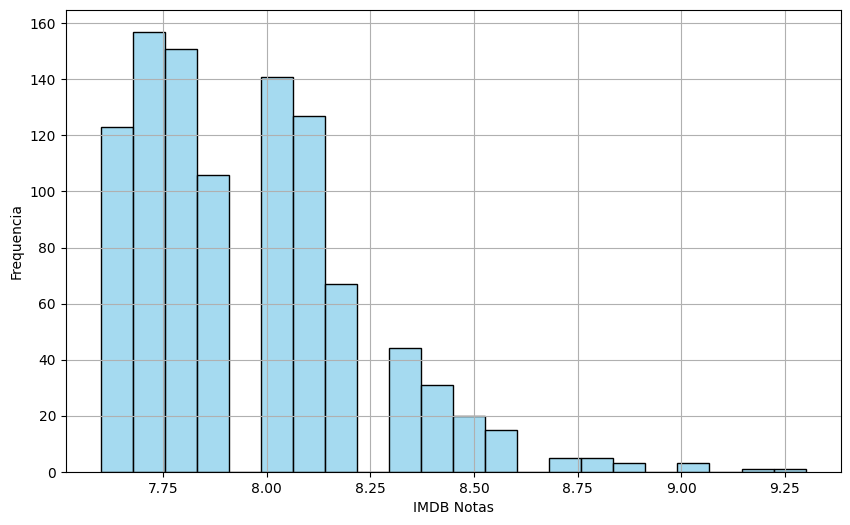

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(imdbDf['IMDB_Rating'], color='skyblue')
plt.xlabel('IMDB Notas')
plt.ylabel('Frequencia')
plt.grid(True)
plt.show()

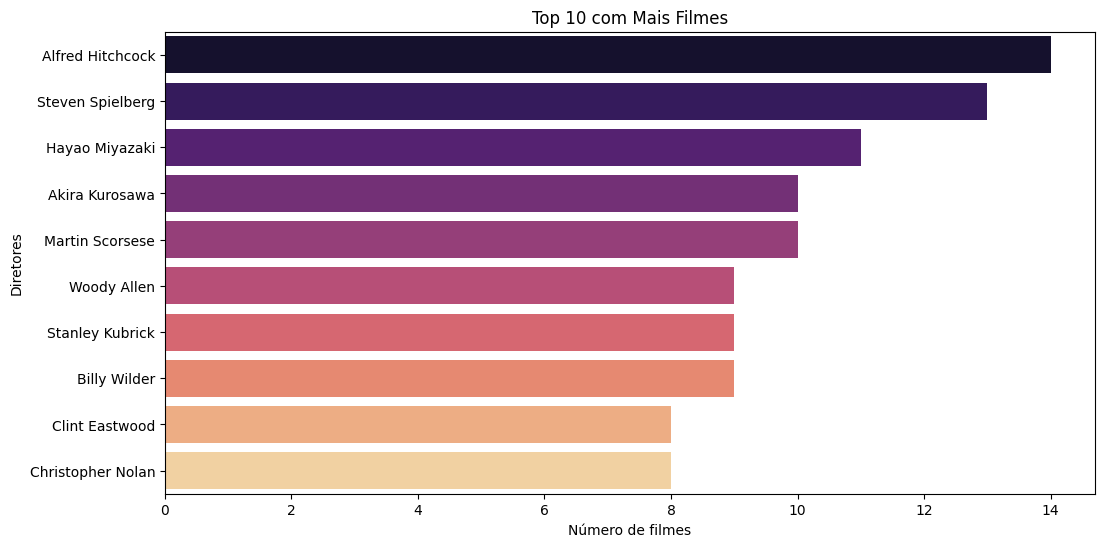

In [ ]:
import warnings
warnings.filterwarnings('ignore')
top_directors = imdbDf['Director'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 10 com Mais Filmes')
plt.xlabel('Número de filmes')
plt.ylabel('Diretores')
plt.show()

In [ ]:
imdbDf['Released_Year'].value_counts()
imdbDf['Released_Year'].value_counts().sort_index()

,count
Released_Year,
1920,1
1921,1
1922,1
1924,1
1925,2
...,...
2017,22
2018,19
2019,23


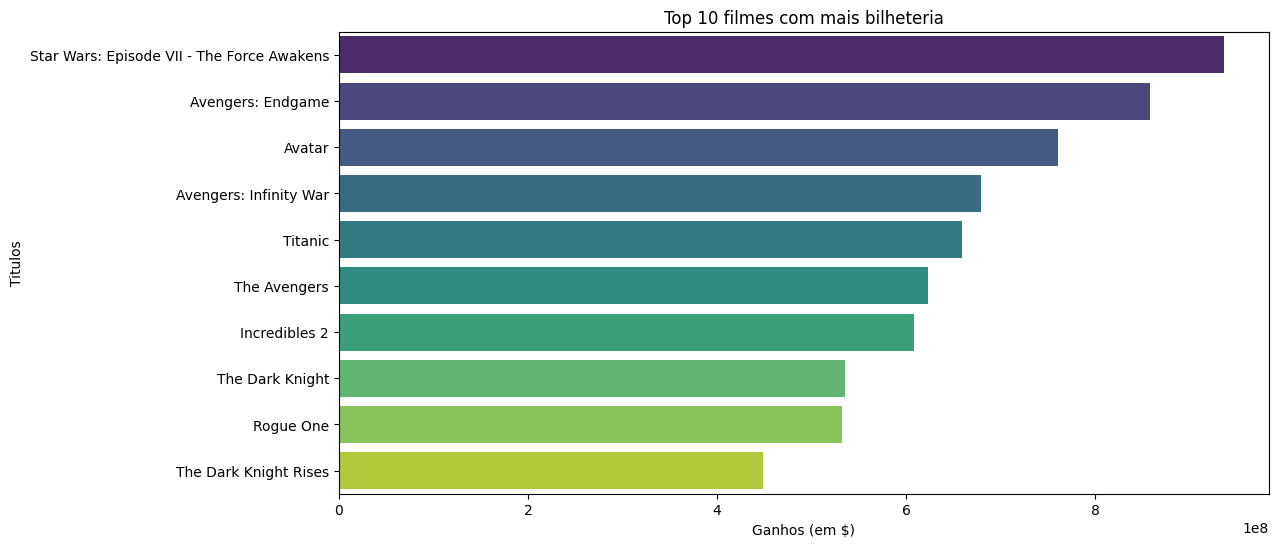

In [ ]:
imdbDf['Gross'] = imdbDf['Gross'].replace('[\$,]', '', regex=True)
imdbDf['Gross'] = pd.to_numeric(imdbDf['Gross'], errors='coerce')
imdbDf_clean = imdbDf.dropna(subset=['Gross'])
top_gross = imdbDf_clean.nlargest(10, 'Gross')
plt.figure(figsize=(12, 6))
sns.barplot(x='Gross', y='Series_Title', data=top_gross, palette='viridis')
plt.title('Top 10 filmes com mais bilheteria')
plt.xlabel('Ganhos (em $)')
plt.ylabel('Titulos')
plt.show()


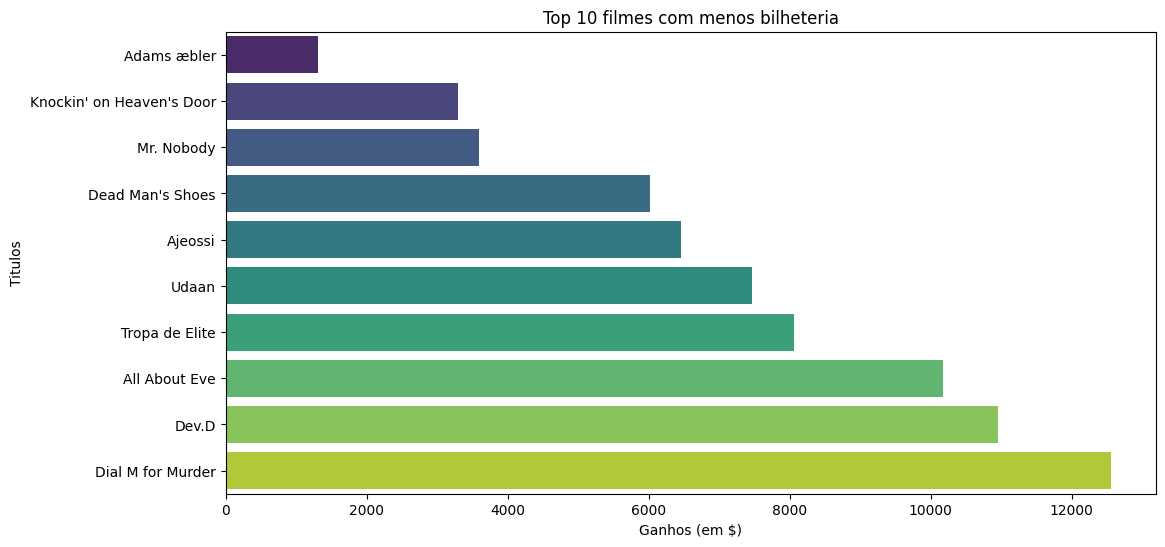

In [ ]:
imdbDf['Gross'] = pd.to_numeric(imdbDf['Gross'], errors='coerce')
less_gross = imdbDf_clean.nsmallest(10, 'Gross')
plt.figure(figsize=(12, 6))
sns.barplot(x='Gross', y='Series_Title', data=less_gross, palette='viridis')
plt.title('Top 10 filmes com menos bilheteria')
plt.xlabel('Ganhos (em $)')
plt.ylabel('Titulos')
plt.show()

In [ ]:
resultado = imdbDf[imdbDf['Released_Year']== "PG"]


if not resultado.empty:
    print("\nDados do filme encontrado:\n")
    print(resultado.T)
else:
    print("Filme não encontrado. Verifique o nome e tente novamente.")



Dados do filme encontrado:

                                                             966
Poster_Link    https://m.media-amazon.com/images/M/MV5BNjEzYj...
Series_Title                                           Apollo 13
Released_Year                                                 PG
Certificate                                                    U
Runtime                                                  140 min
Genre                                  Adventure, Drama, History
IMDB_Rating                                                  7.6
Overview       NASA must devise a strategy to return Apollo 1...
Meta_score                                                  77.0
Director                                              Ron Howard
Star1                                                  Tom Hanks
Star2                                                Bill Paxton
Star3                                                Kevin Bacon
Star4                                                Gary Sin

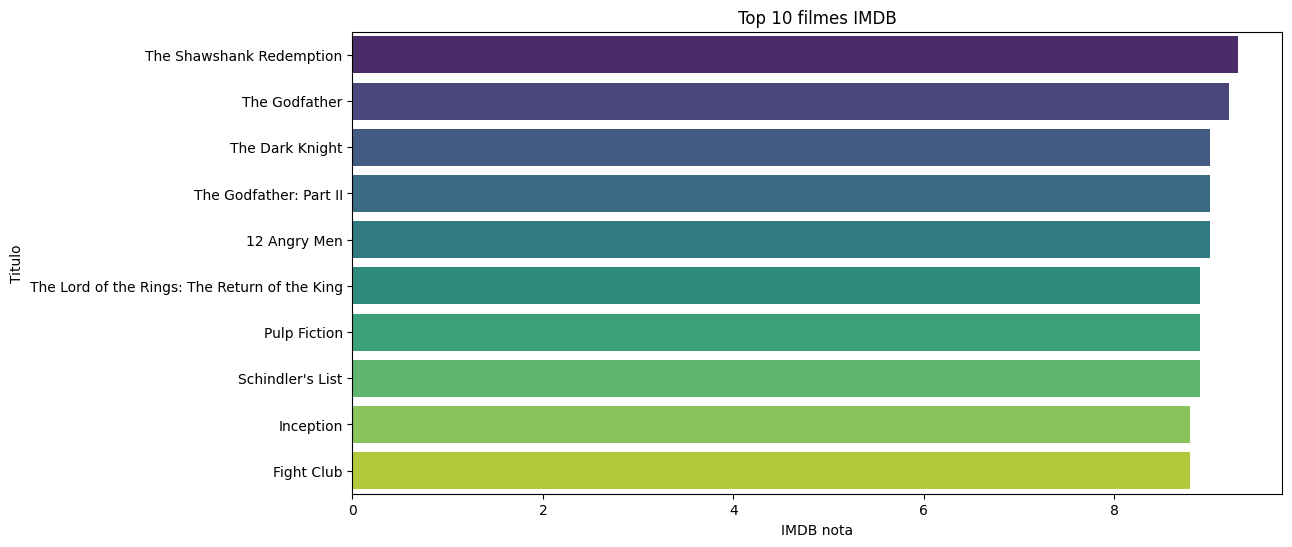

In [ ]:
top_rated_movies = imdbDf.nlargest(10, 'IMDB_Rating')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_rated_movies, x='IMDB_Rating', y='Series_Title', palette='viridis')
plt.title('Top 10 filmes IMDB')
plt.xlabel('IMDB nota')
plt.ylabel('Titulo')
plt.show()

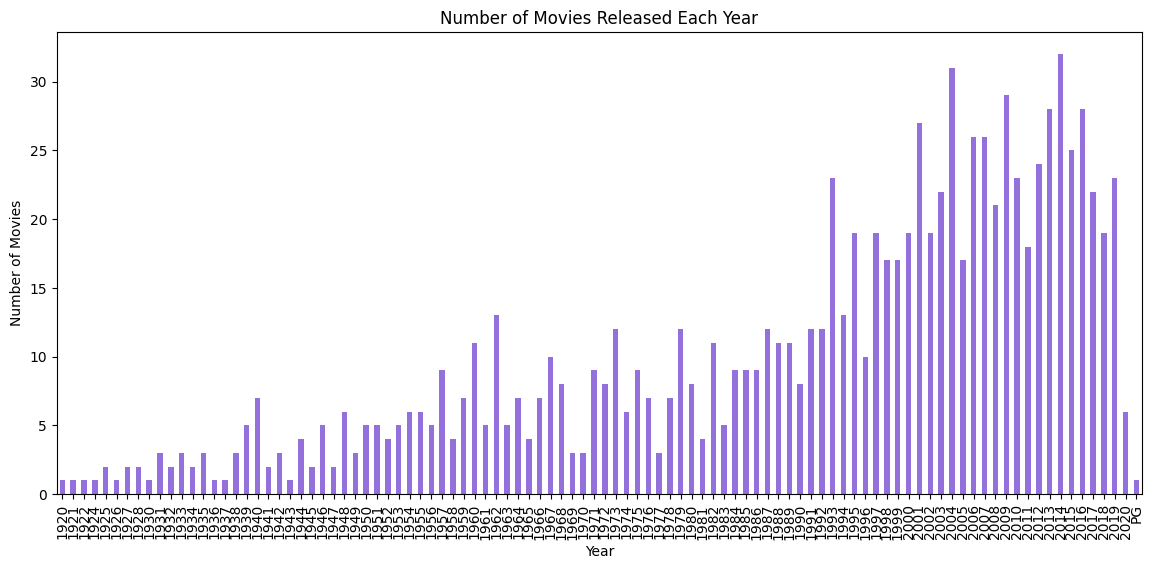

In [ ]:
plt.figure(figsize=(14, 6))
imdbDf['Released_Year'].value_counts().sort_index().plot(kind='bar', color='mediumpurple')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

In [ ]:
genres_list = []
for genres in list(imdbDf['Genre'].str.split(',')):
    for genre in genres:
        genres_list.append(genre)
cleaned_genres = [genre.strip() for genre in genres_list]
genre_counts = {}
for genre in cleaned_genres:
    if genre not in genre_counts:
        genre_counts[genre]=1
    else:
        genre_counts[genre] = genre_counts[genre] + 1
genre_counts

{'Drama': 724,
 'Crime': 209,
 'Action': 189,
 'Adventure': 196,
 'Biography': 109,
 'History': 56,
 'Sci-Fi': 67,
 'Romance': 125,
 'Western': 20,
 'Fantasy': 66,
 'Comedy': 233,
 'Thriller': 137,
 'Animation': 82,
 'Family': 56,
 'War': 51,
 'Mystery': 99,
 'Music': 35,
 'Horror': 32,
 'Musical': 17,
 'Film-Noir': 19,
 'Sport': 19}

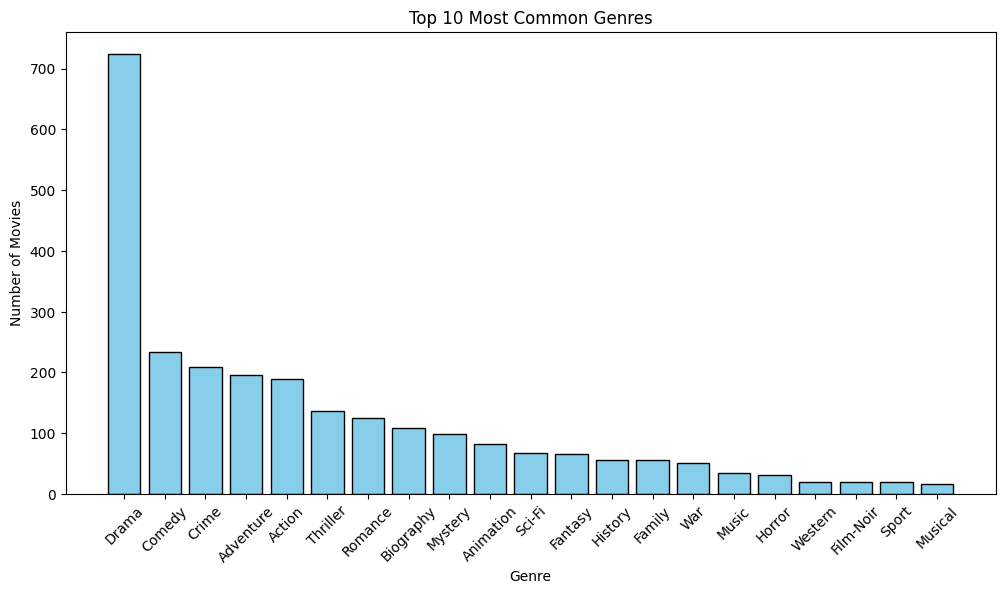

In [ ]:
sorted_genre_counts = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(12, 6))
plt.bar(list(sorted_genre_counts.keys()), list(sorted_genre_counts.values()), color='skyblue', edgecolor='black')
plt.title('Top 10 generos mais comuns')
plt.xlabel('Gnero')
plt.ylabel('Number de Filmes')
plt.xticks(rotation = 45)
plt.show()

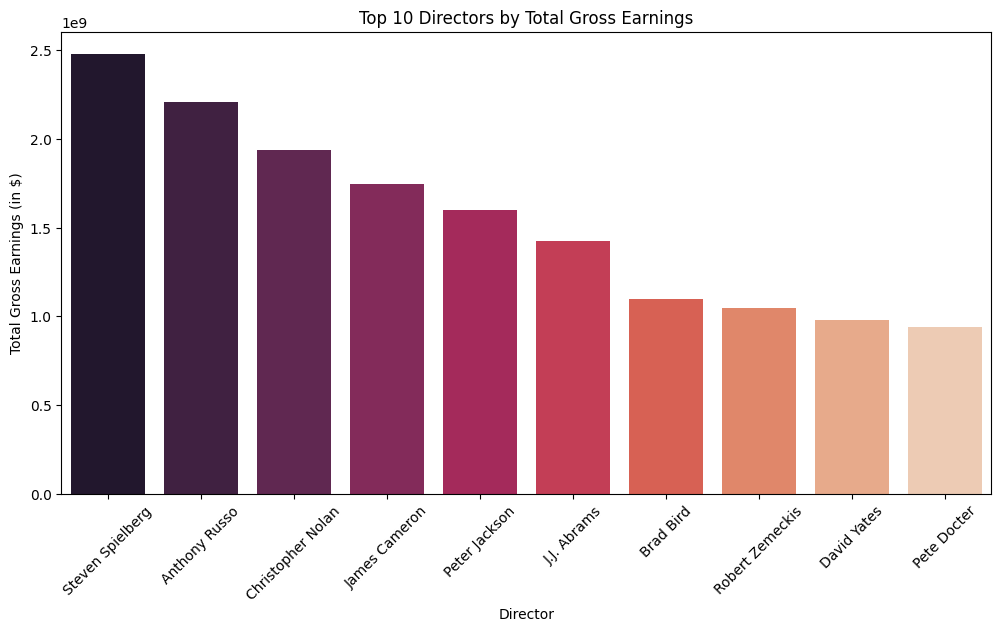

In [ ]:
director_gross = imdbDf.groupby('Director')['Gross'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=director_gross.index, y=director_gross.values, palette='rocket')
plt.title('Top 10 Directors by Total Gross Earnings')
plt.xlabel('Director')
plt.ylabel('Total Gross Earnings (in $)')
plt.xticks(rotation=45)
plt.show()

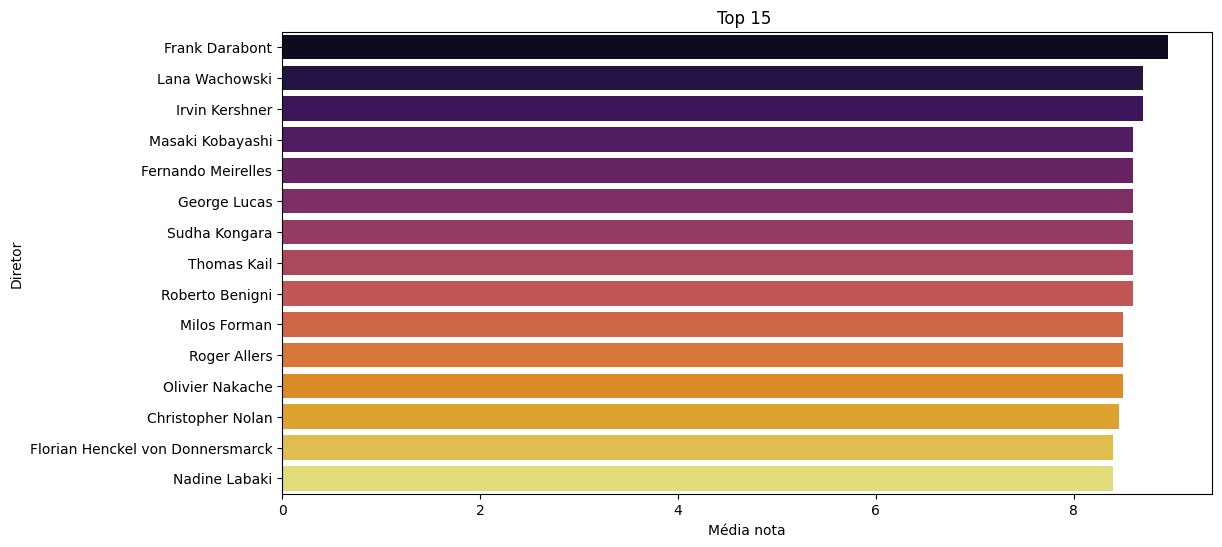

In [ ]:
top_directors = imdbDf.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='inferno')
plt.title('Top 15 ')
plt.xlabel('Média nota')
plt.ylabel('Diretor')
plt.show()

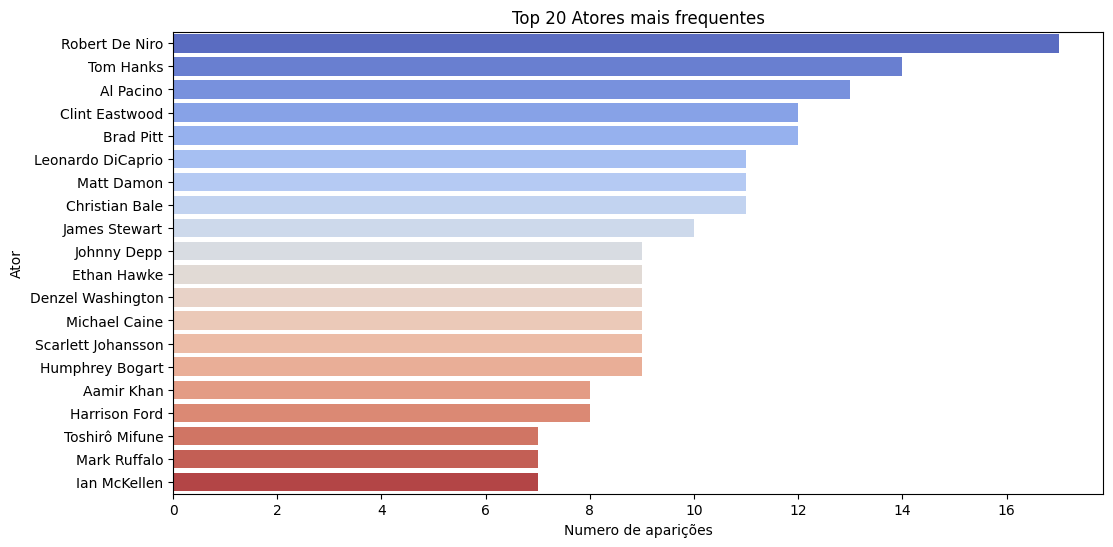

In [ ]:
actors = pd.Series(imdbDf[['Star1', 'Star2', 'Star3', 'Star4']].values.ravel())
top_actors = actors.value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='coolwarm')
plt.title('Top 20 Atores mais frequentes')
plt.xlabel('Numero de aparições')
plt.ylabel('Ator')
plt.show()